In [2]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("preprocessed_eeg_data.csv")

# Basic information
print(data.info())
print(data.describe())

# Class distribution
print(data['Label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965943 entries, 0 to 965942
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Fp1         965943 non-null  float64
 1   Fp2         965943 non-null  float64
 2   F3          965943 non-null  float64
 3   F4          965943 non-null  float64
 4   C3          965943 non-null  float64
 5   C4          965943 non-null  float64
 6   P3          965943 non-null  float64
 7   P4          965943 non-null  float64
 8   O1          965943 non-null  float64
 9   O2          965943 non-null  float64
 10  F7          965943 non-null  float64
 11  F8          965943 non-null  float64
 12  T3          965943 non-null  float64
 13  T4          965943 non-null  float64
 14  T5          965943 non-null  float64
 15  T6          965943 non-null  float64
 16  Fz          965943 non-null  float64
 17  Cz          965943 non-null  float64
 18  Pz          965943 non-null  float64
 19  La

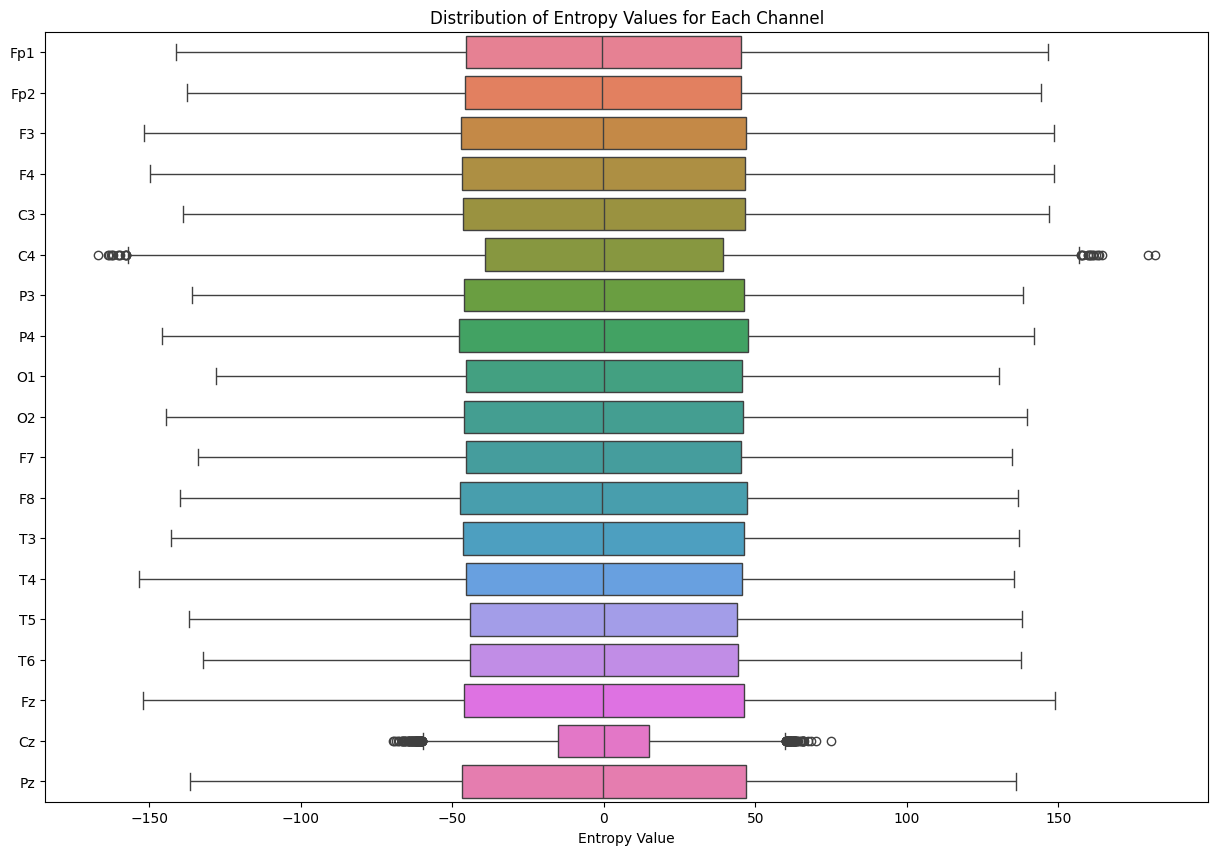

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns=['Patient_ID', 'Label']), orient="h")
plt.title("Distribution of Entropy Values for Each Channel")
plt.xlabel("Entropy Value")
plt.show()


C:\Users\smrit\AppData\Local\Temp\ipykernel_14468\2663896577.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data['Label'] == 1][channel], ax=axes[i // 4, i % 4], label='ADHD')
C:\Users\smrit\AppData\Local\Temp\ipykernel_14468\2663896577.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[data['Label'] == 0][channel], ax=axes[i // 4, i % 4], label='Control')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


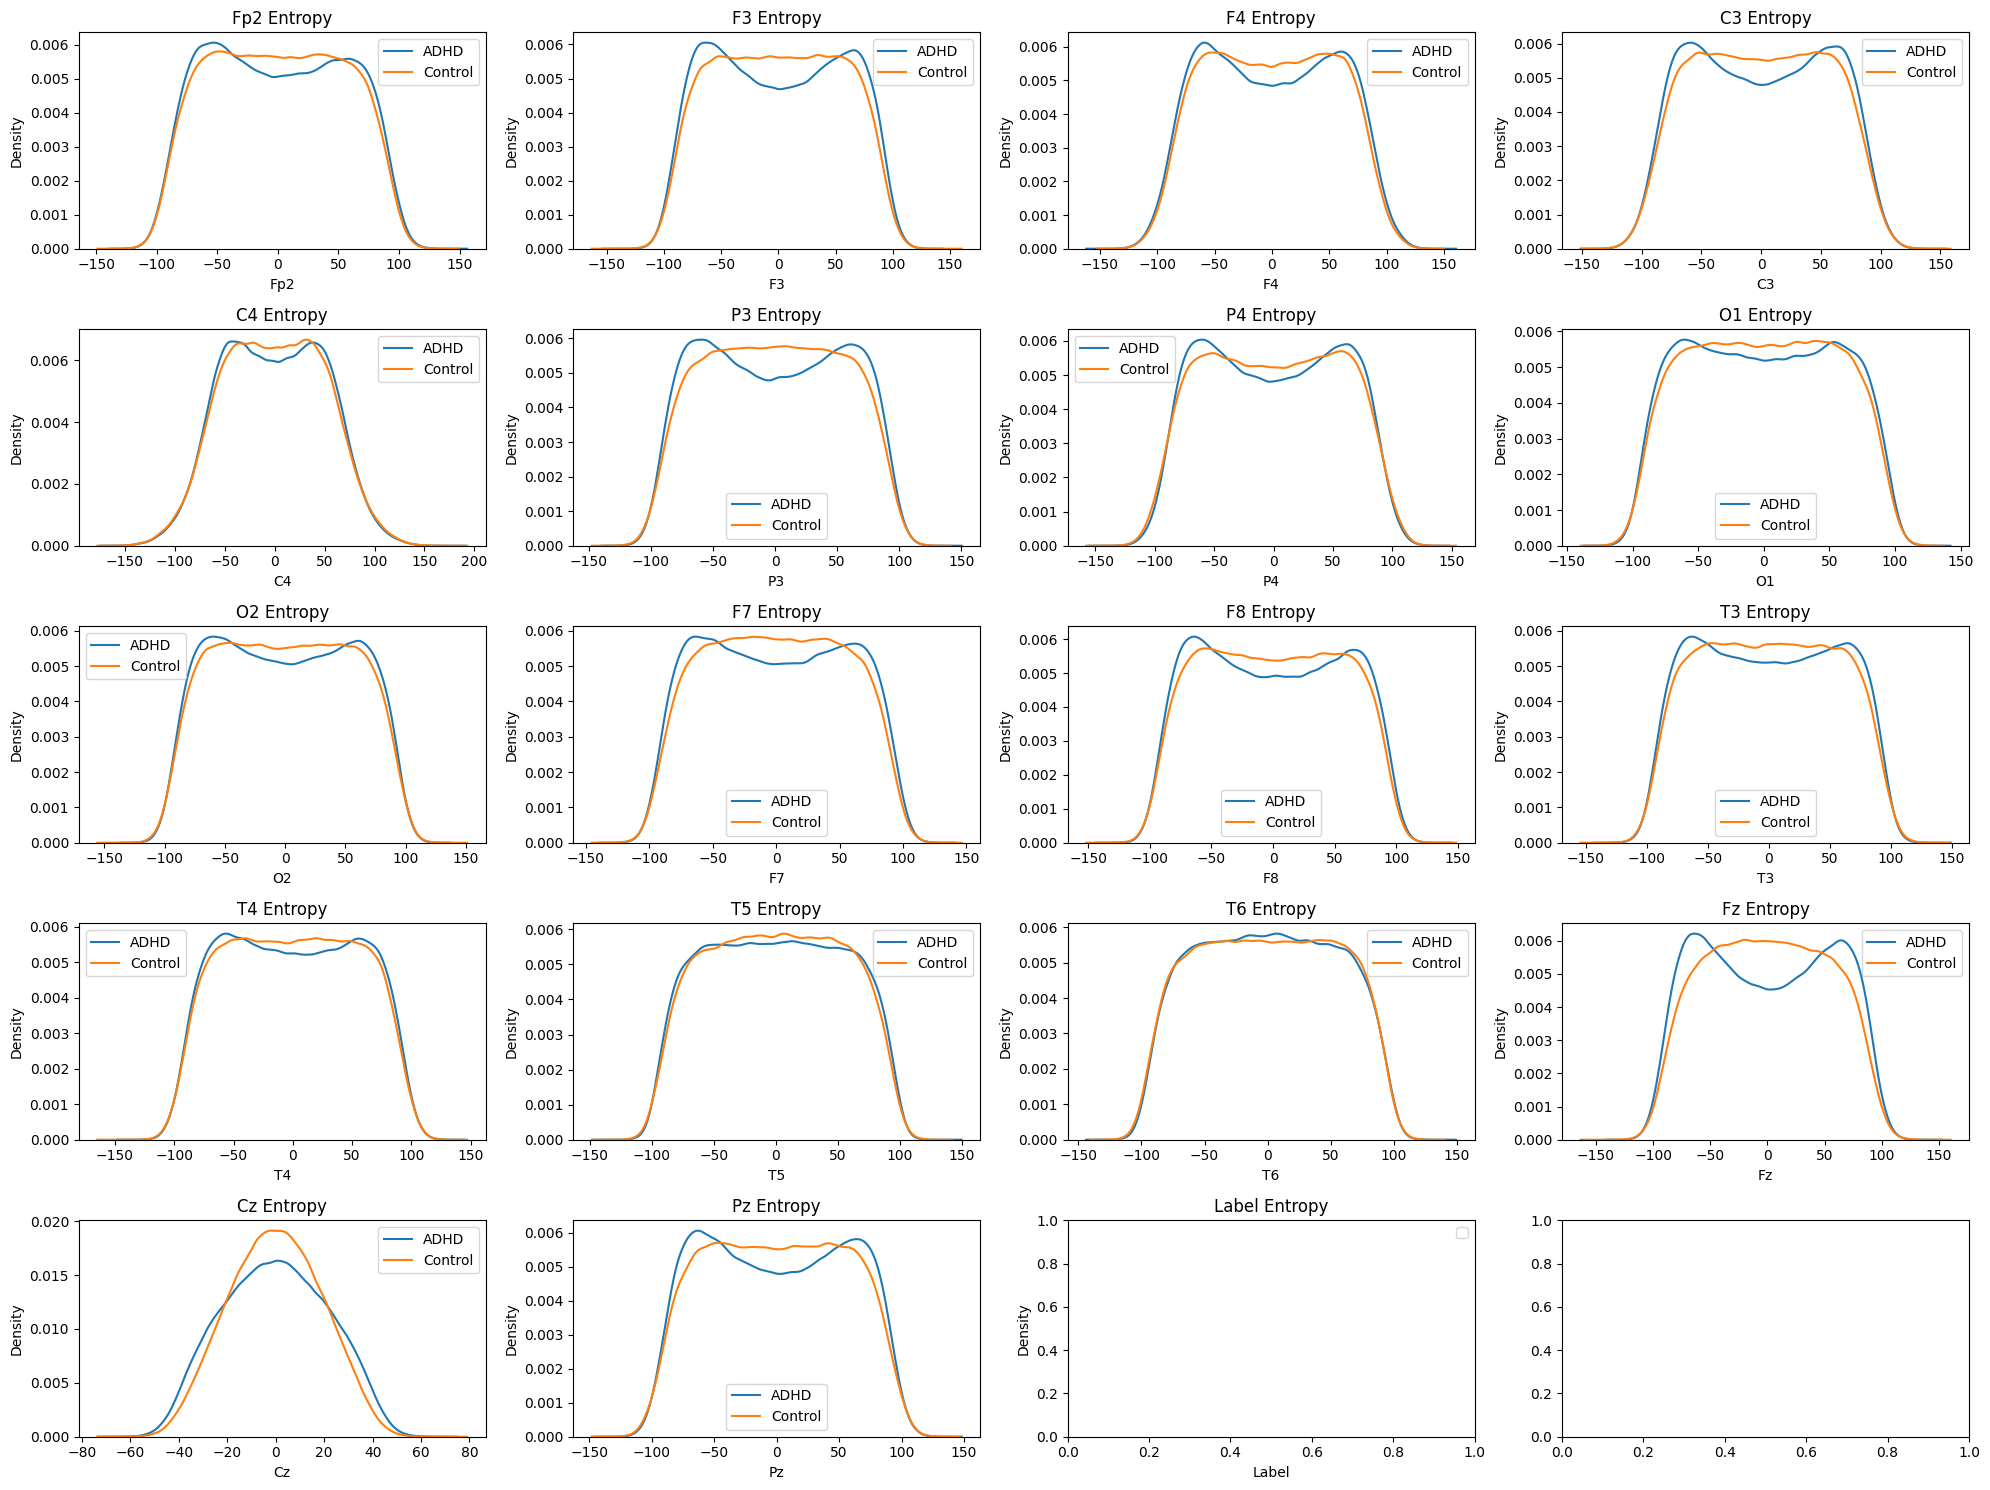

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
channels = data.columns[1:-1]  # Assuming columns 1 to -1 are channel entropy values
for i, channel in enumerate(channels):
    sns.kdeplot(data[data['Label'] == 1][channel], ax=axes[i // 4, i % 4], label='ADHD')
    sns.kdeplot(data[data['Label'] == 0][channel], ax=axes[i // 4, i % 4], label='Control')
    axes[i // 4, i % 4].set_title(f'{channel} Entropy')
    axes[i // 4, i % 4].legend()

plt.tight_layout()
plt.show()


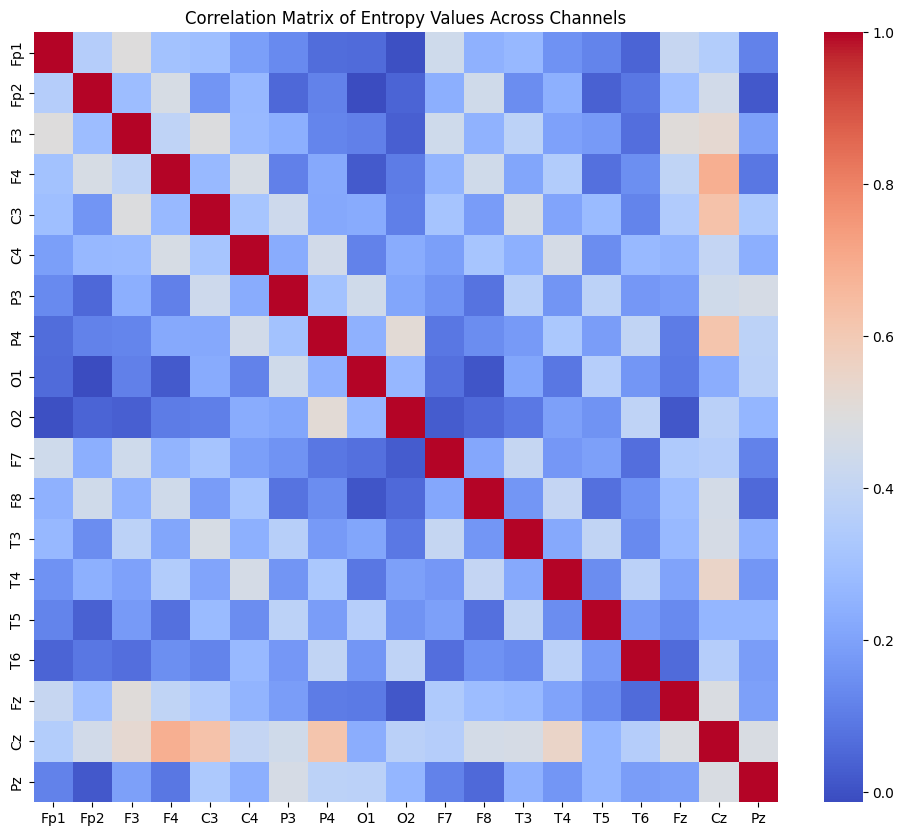

In [4]:
plt.figure(figsize=(12, 10))
corr_matrix = data.drop(columns=['Patient_ID', 'Label']).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix of Entropy Values Across Channels")
plt.show()


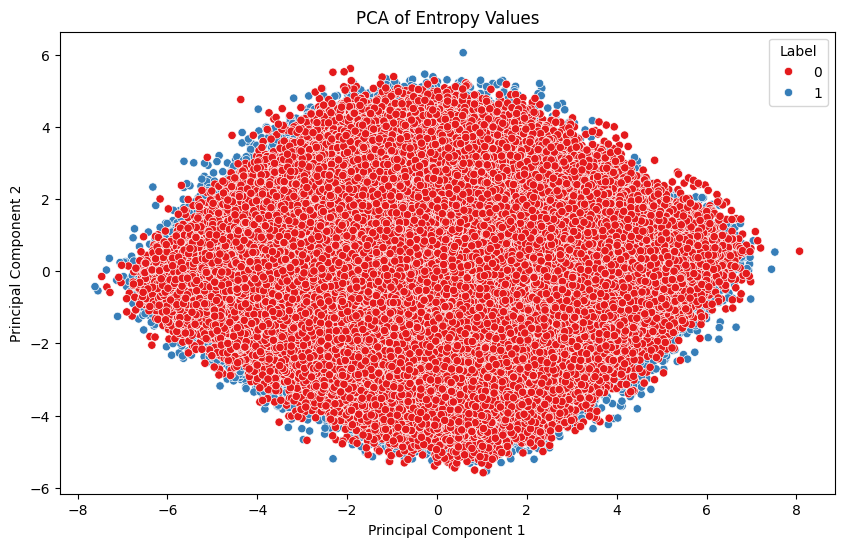

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
# Separate features and target
X = data.drop(columns=['Label','Patient_ID'])
y = data['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.title('PCA of Entropy Values')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [6]:
data.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,Label,Patient_ID
0,-0.000027,-0.000056,-0.000066,-0.000117,-0.000103,-0.000282,-0.000054,-0.000095,-0.000012,-0.000042,...,-0.000048,-0.000051,-0.000066,-0.000018,-0.000035,-0.000058,-0.000575,-0.000065,1,v10p_v10p.csv
1,2.505235,7.988735,-23.155573,13.158681,-41.554782,19.788299,-45.323046,-11.021028,23.793695,27.782912,...,-11.466725,-104.455994,-6.424960,-103.123461,-36.700671,-12.189153,-10.646640,8.114466,1,v10p_v10p.csv
2,5.202385,16.384989,-46.934837,27.432973,-80.473291,41.506415,13.996482,-21.867794,50.440562,-4.347586,...,-23.912986,-10.040215,-19.797432,-22.937017,-73.182966,-25.069648,-16.936134,14.340312,1,v10p_v10p.csv
3,5.342335,19.511770,-74.928989,29.924984,-66.207983,36.746148,-35.766868,-21.443170,70.663297,-8.030366,...,-38.354829,-19.241083,-84.150907,-58.017447,-73.308279,-41.299169,-23.842190,-2.022266,1,v10p_v10p.csv
4,6.052312,23.632955,-58.987846,36.266236,-43.835454,37.646616,-47.394149,-18.914163,-10.572183,-4.621463,...,-55.296851,-62.029102,-44.070247,-59.233797,-72.817302,-59.233398,-18.465677,-24.391653,1,v10p_v10p.csv


C:\Users\smrit\AppData\Local\Temp\ipykernel_14468\978145899.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_entropy_counts.index, y=high_entropy_counts.values, palette='viridis')


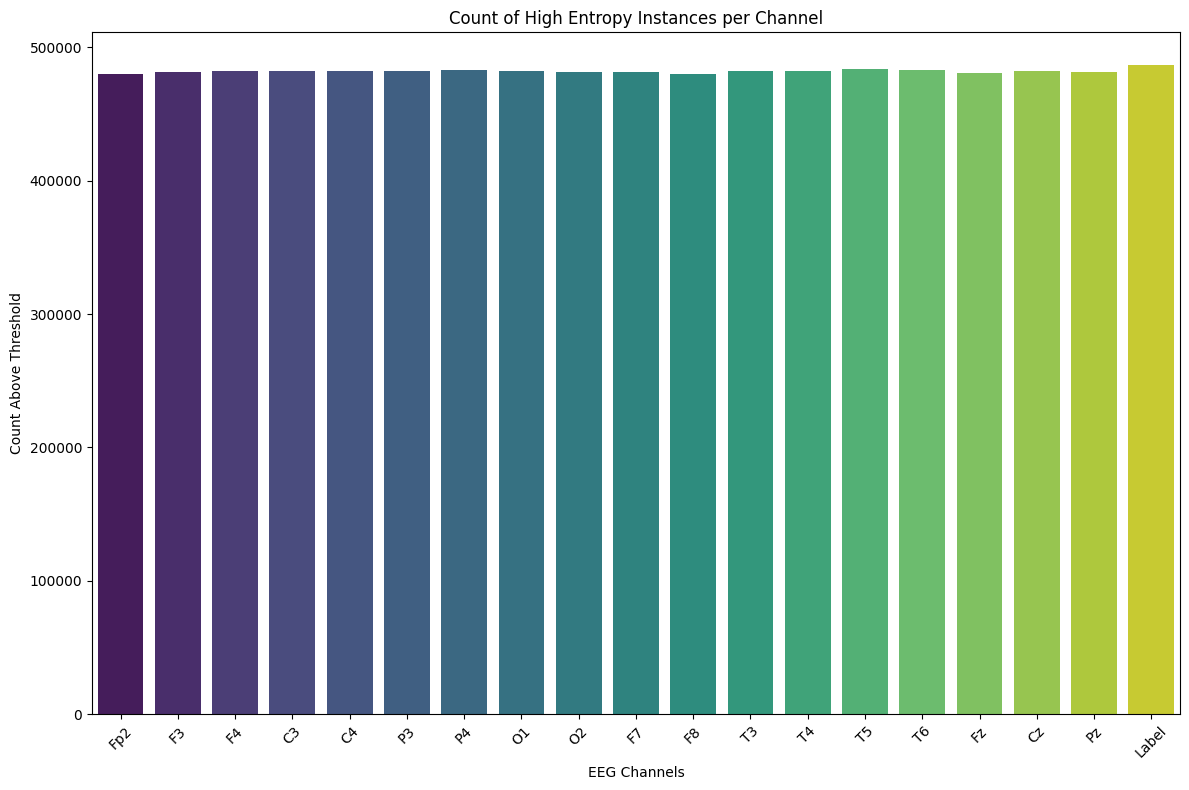

In [7]:
high_entropy_threshold = data[channels].mean().mean()  # Calculate a threshold
high_entropy_counts = data[channels].apply(lambda x: (x > high_entropy_threshold).sum())

plt.figure(figsize=(12, 8))
sns.barplot(x=high_entropy_counts.index, y=high_entropy_counts.values, palette='viridis')
plt.title("Count of High Entropy Instances per Channel")
plt.xlabel("EEG Channels")
plt.ylabel("Count Above Threshold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


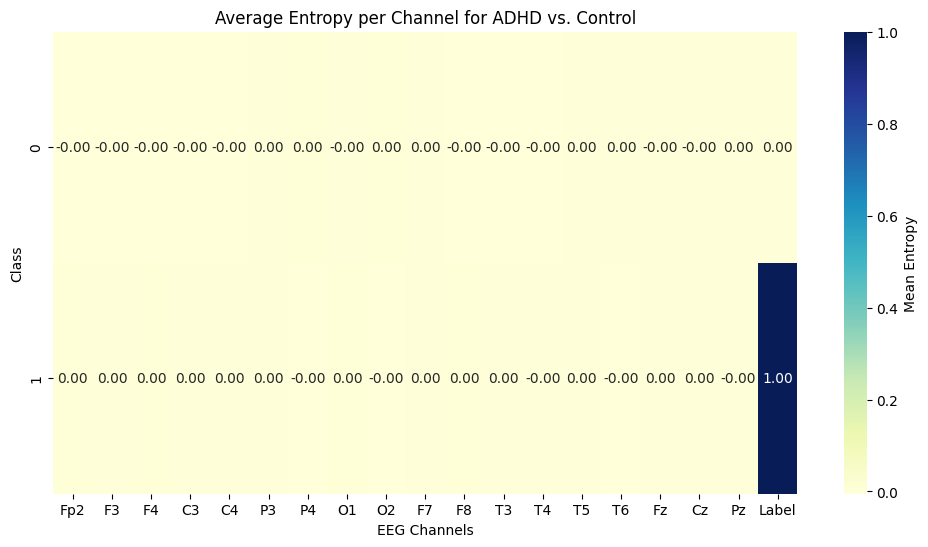

In [8]:
avg_entropy_heatmap = data.groupby("Label")[channels].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(avg_entropy_heatmap, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Mean Entropy'})
plt.title("Average Entropy per Channel for ADHD vs. Control")
plt.xlabel("EEG Channels")
plt.ylabel("Class")
plt.show()


In [3]:

# Load preprocessed EEG data

# Load approximate entropy data
approx_entropy_df = pd.read_csv('Combined_Entropy.csv')


In [4]:
approx_entropy_df.shape

(121, 21)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined entropy data

# Prepare features (X) and labels (y)
X = approx_entropy_df.drop(columns=['Patient_ID', 'Label'])  # Drop non-feature columns
y = approx_entropy_df['Label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Decision Tree Model Accuracy: 0.7600


C:\Users\smrit\AppData\Local\Temp\ipykernel_15928\1682983819.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


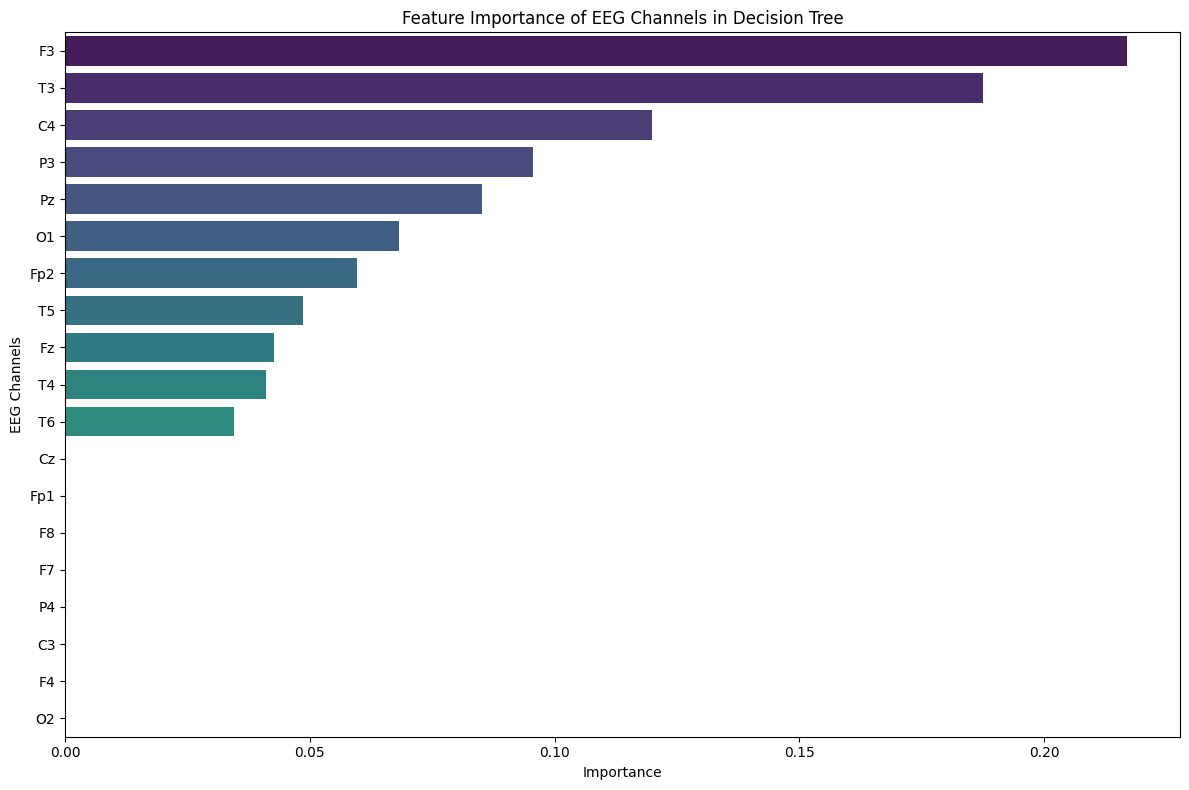

In [6]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")

# Retrieve feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance of EEG Channels in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("EEG Channels")
plt.tight_layout()
plt.show()


In [7]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (96, 19)
Shape of y_train: (96,)
Shape of X_test: (25, 19)
Shape of y_test: (25,)


              precision    recall  f1-score   support

     Control       0.86      0.75      0.80        16
        ADHD       0.64      0.78      0.70         9

    accuracy                           0.76        25
   macro avg       0.75      0.76      0.75        25
weighted avg       0.78      0.76      0.76        25



<Figure size 800x600 with 0 Axes>

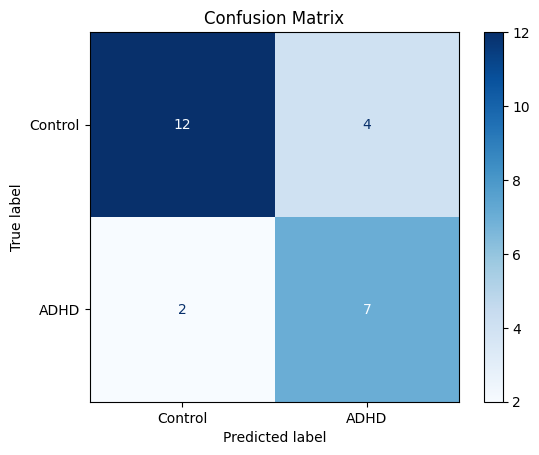

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Control', 'ADHD'])
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Control', 'ADHD'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

     Control       0.88      0.44      0.58        16
        ADHD       0.47      0.89      0.62         9

    accuracy                           0.60        25
   macro avg       0.67      0.66      0.60        25
weighted avg       0.73      0.60      0.59        25



<Figure size 800x600 with 0 Axes>

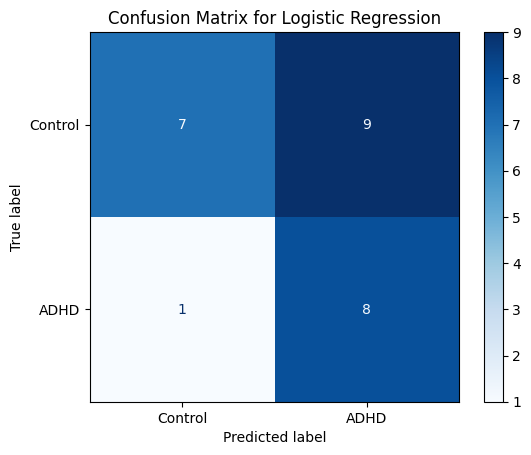

In [35]:
from sklearn.linear_model import LogisticRegression


# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Control', 'ADHD'])
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Control', 'ADHD'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


              precision    recall  f1-score   support

     Control       0.75      0.75      0.75        16
        ADHD       0.56      0.56      0.56         9

    accuracy                           0.68        25
   macro avg       0.65      0.65      0.65        25
weighted avg       0.68      0.68      0.68        25



<Figure size 800x600 with 0 Axes>

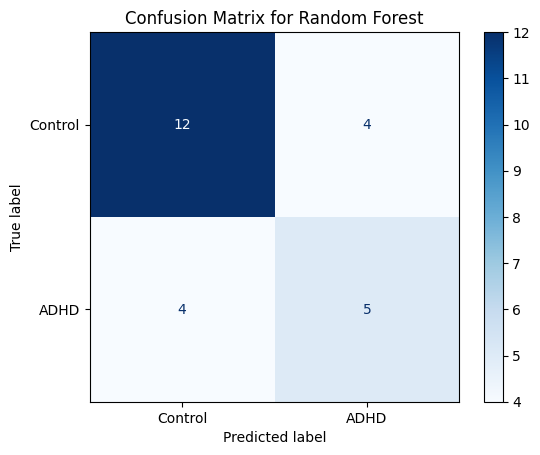

In [9]:
from sklearn.ensemble import RandomForestClassifier


# Initialize and train the logistic regression model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Control', 'ADHD'])
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Control', 'ADHD'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Adjust the size as needed
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()
